# Neural Network Binary Classification

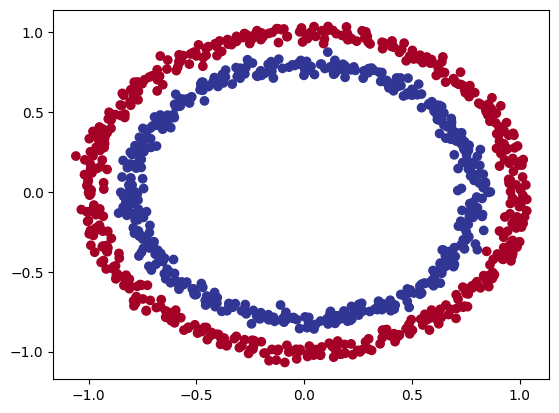

In [1]:
# Import scikit learn (ML library) and PyTorch
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
from torch import nn

# Import Pandas & matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

# Scatter plot of our points
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [2]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Construct model that subclasses nn.Module
class CircleModelV1(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    # Creating some layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # Forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

In [4]:
# Instantiate model and send to target device
model_0 = CircleModelV1().to(device)

# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() # Binary cross entropy with logits loss
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # Stochastic gradient descent optimizer

# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [5]:
# Set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs
epochs = 200

# Set data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train model
for epoch in range(epochs):
  # Put model in training mode
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73323, Accuracy: 50.00% | Test loss: 0.72739, Test acc: 50.00%
Epoch: 10 | Loss: 0.72970, Accuracy: 50.00% | Test loss: 0.72398, Test acc: 50.00%
Epoch: 20 | Loss: 0.72651, Accuracy: 50.00% | Test loss: 0.72092, Test acc: 50.00%
Epoch: 30 | Loss: 0.72363, Accuracy: 50.00% | Test loss: 0.71815, Test acc: 50.00%
Epoch: 40 | Loss: 0.72102, Accuracy: 50.00% | Test loss: 0.71566, Test acc: 50.00%
Epoch: 50 | Loss: 0.71867, Accuracy: 50.00% | Test loss: 0.71340, Test acc: 50.00%
Epoch: 60 | Loss: 0.71653, Accuracy: 50.00% | Test loss: 0.71136, Test acc: 50.00%
Epoch: 70 | Loss: 0.71460, Accuracy: 50.00% | Test loss: 0.70952, Test acc: 50.00%
Epoch: 80 | Loss: 0.71284, Accuracy: 50.00% | Test loss: 0.70786, Test acc: 50.00%
Epoch: 90 | Loss: 0.71125, Accuracy: 50.00% | Test loss: 0.70635, Test acc: 50.00%
Epoch: 100 | Loss: 0.70980, Accuracy: 50.00% | Test loss: 0.70498, Test acc: 50.00%
Epoch: 110 | Loss: 0.70849, Accuracy: 50.00% | Test loss: 0.70374, Test acc: 50.00%
Epo

In [6]:
# Construct model (version 2) that subclasses nn.Module
class CircleModelV2(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    # Creating some layers
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #relu is a non-linear activation function

  # Forward pass
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.layer_1(x))))

In [7]:
# Instantiate model and send to target device
model_1 = CircleModelV2().to(device)

# Setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss() # Binary cross entropy with logits loss
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.01) # Stochastic gradient descent optimizer

In [8]:
# Set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs
epochs = 1000

# Set data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train model
for epoch in range(epochs):
  # Put model in training mode
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69833, Accuracy: 50.00% | Test loss: 0.69674, Test acc: 47.50%
Epoch: 100 | Loss: 0.12531, Accuracy: 99.88% | Test loss: 0.16591, Test acc: 98.50%
Epoch: 200 | Loss: 0.01662, Accuracy: 100.00% | Test loss: 0.03680, Test acc: 99.50%
Epoch: 300 | Loss: 0.00762, Accuracy: 100.00% | Test loss: 0.01976, Test acc: 99.50%
Epoch: 400 | Loss: 0.00490, Accuracy: 100.00% | Test loss: 0.01632, Test acc: 99.50%
Epoch: 500 | Loss: 0.00359, Accuracy: 100.00% | Test loss: 0.01453, Test acc: 99.50%
Epoch: 600 | Loss: 0.00279, Accuracy: 100.00% | Test loss: 0.01364, Test acc: 99.50%
Epoch: 700 | Loss: 0.00226, Accuracy: 100.00% | Test loss: 0.01304, Test acc: 99.50%
Epoch: 800 | Loss: 0.00188, Accuracy: 100.00% | Test loss: 0.01278, Test acc: 99.50%
Epoch: 900 | Loss: 0.00160, Accuracy: 100.00% | Test loss: 0.01267, Test acc: 99.50%


# Neural Network Multiclass Classification

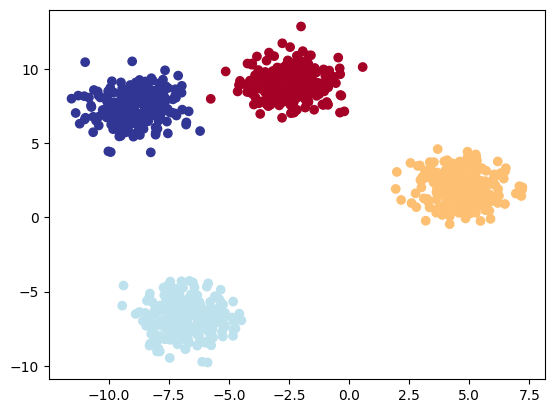

In [14]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
LEARNING_RATE = 0.01
EPOCHS = 1000

# Create data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            shuffle=True,
                            random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# Plot data
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [20]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Construct model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8) -> None:
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [21]:
# Instantiate our model
model_2 = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES).to(device)

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=LEARNING_RATE)

In [22]:
# Random seed
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Set data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Train and test data
for epoch in range(EPOCHS):
  # Put model in training mode
  model_2.train()

  # 1. Forward pass
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_score(y_true=y_train.cpu(), y_pred=y_pred.cpu())

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_score(y_true=y_test.cpu(), y_pred=test_pred.cpu())

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.03702, Accuracy: 0.69% | Test loss: 0.83829, Test acc: 0.75%
Epoch: 100 | Loss: 0.00277, Accuracy: 1.00% | Test loss: 0.00150, Test acc: 1.00%
Epoch: 200 | Loss: 0.00192, Accuracy: 1.00% | Test loss: 0.00085, Test acc: 1.00%
Epoch: 300 | Loss: 0.00152, Accuracy: 1.00% | Test loss: 0.00059, Test acc: 1.00%
Epoch: 400 | Loss: 0.00125, Accuracy: 1.00% | Test loss: 0.00044, Test acc: 1.00%
Epoch: 500 | Loss: 0.00105, Accuracy: 1.00% | Test loss: 0.00032, Test acc: 1.00%
Epoch: 600 | Loss: 0.00087, Accuracy: 1.00% | Test loss: 0.00024, Test acc: 1.00%
Epoch: 700 | Loss: 0.00072, Accuracy: 1.00% | Test loss: 0.00017, Test acc: 1.00%
Epoch: 800 | Loss: 0.00059, Accuracy: 1.00% | Test loss: 0.00012, Test acc: 1.00%
Epoch: 900 | Loss: 0.00048, Accuracy: 1.00% | Test loss: 0.00008, Test acc: 1.00%


In [23]:
# Make predictions
model_2.eval()
with torch.inference_mode():
  y_logits = model_2(X_test).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

y_pred == y_test

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr